In [3]:
import pandas as pd
data=pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
data["Age"].fillna(data["Age"].median(),inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x=data[['Age','Pclass']]
y=data['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))

Accuracy=0.72


<AxesSubplot:xlabel='Age', ylabel='Survived'>

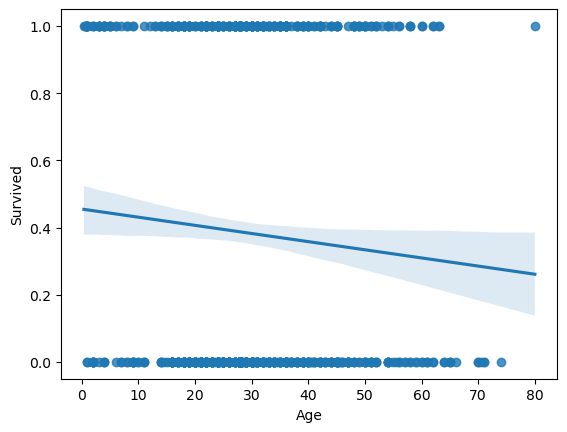

In [11]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

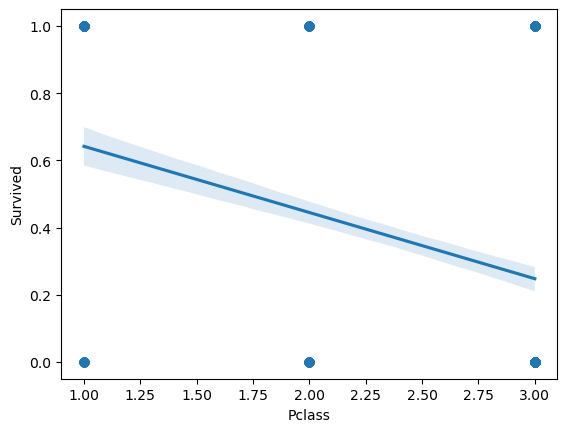

In [12]:
sns.regplot(x='Pclass',y='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

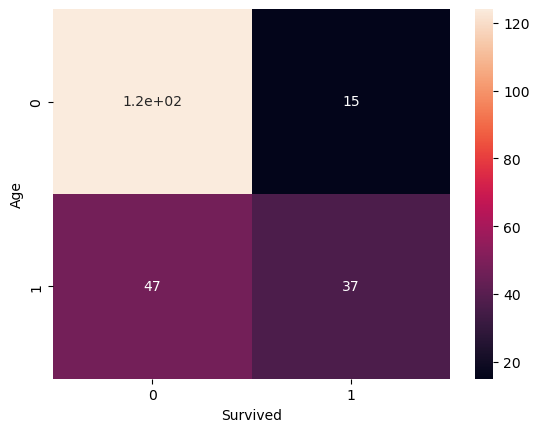

In [13]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Age'],colnames=['Survived'])
sns.heatmap(confusion_matrix,annot=True)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

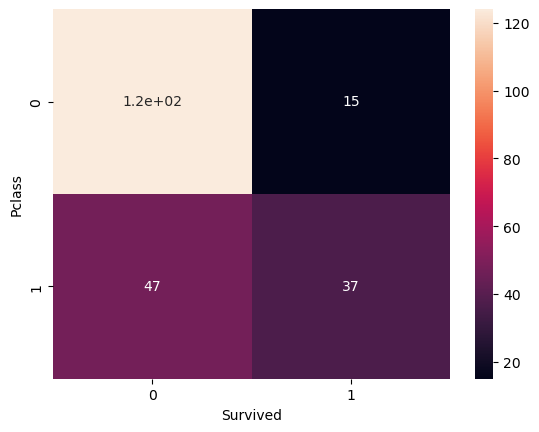

In [14]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Pclass'],colnames=['Survived'])
sns.heatmap(confusion_matrix,annot=True)

In [17]:
auc= metrics.roc_auc_score(y_test,y_pred)
print (auc)

0.6662812607057211
